In [1]:
import pandas as pd
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
from nltk.corpus import stopwords
import nltk
import re
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
import joblib
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.tree import DecisionTreeClassifier

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\imagicahealth\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imagicahealth\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\imagicahealth\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
train=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
print(train.shape,test.shape)

(20800, 5) (5200, 4)


In [5]:
train.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [6]:
print(train.isnull().sum())

id           0
title      558
author    1957
text        39
label        0
dtype: int64


In [7]:
print(test.isnull().sum())

id          0
title     122
author    503
text        7
dtype: int64


In [8]:
train=train.fillna('')
test=test.fillna('')

In [9]:
print(train.isnull().sum())
print(test.isnull().sum())

id        0
title     0
author    0
text      0
label     0
dtype: int64
id        0
title     0
author    0
text      0
dtype: int64


In [10]:
train['total']=train['title']+' '+train['author']+' '+train['text']
test['total']=test['title']+' '+test['author']+' '+test['text']

In [11]:
train.head()

,id,title,author,text,label,total
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"FLYNN: Hillary Clinton, Big Woman on Campus - ..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Why the Truth Might Get You Fired Consortiumne...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,15 Civilians Killed In Single US Airstrike Hav...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Iranian woman jailed for fictional unpublished...


In [12]:
real_words=''

for val in train[train['label']==1].total:
    
    tokens=val.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    real_words+=" ".join(tokens)+" "

In [13]:
fake_words=''

for val in train[train['label']==0].total:
    
    tokens=val.split()
    
    for i in range(len(tokens)):
        tokens[i]=tokens[i].lower()
    fake_words+=" ".join(tokens)+" "

In [14]:
stopwords = set(STOPWORDS) 

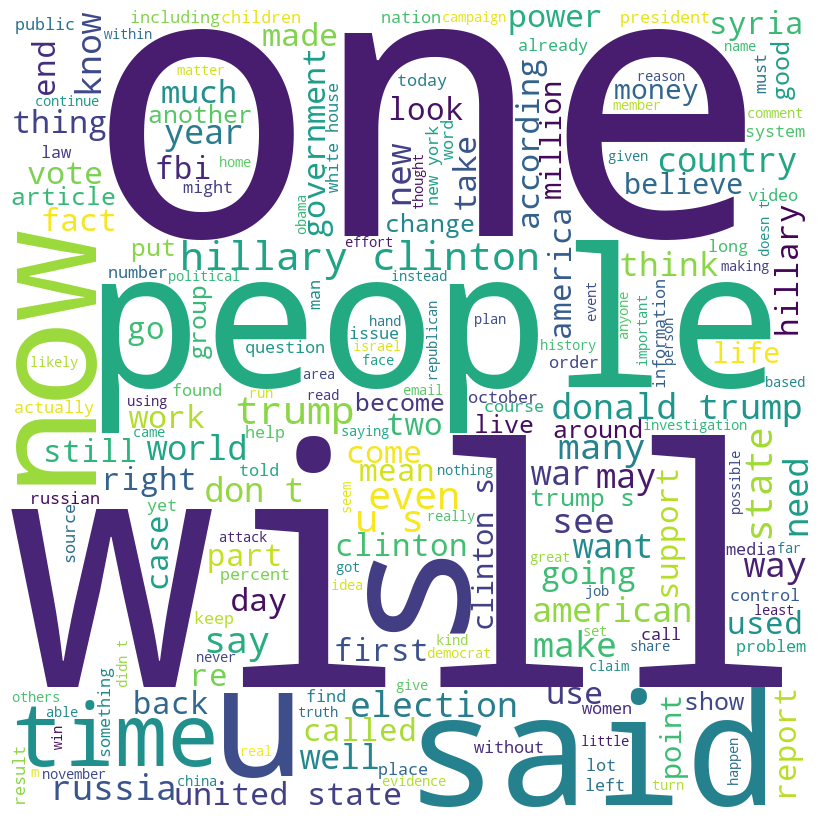

In [15]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(real_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

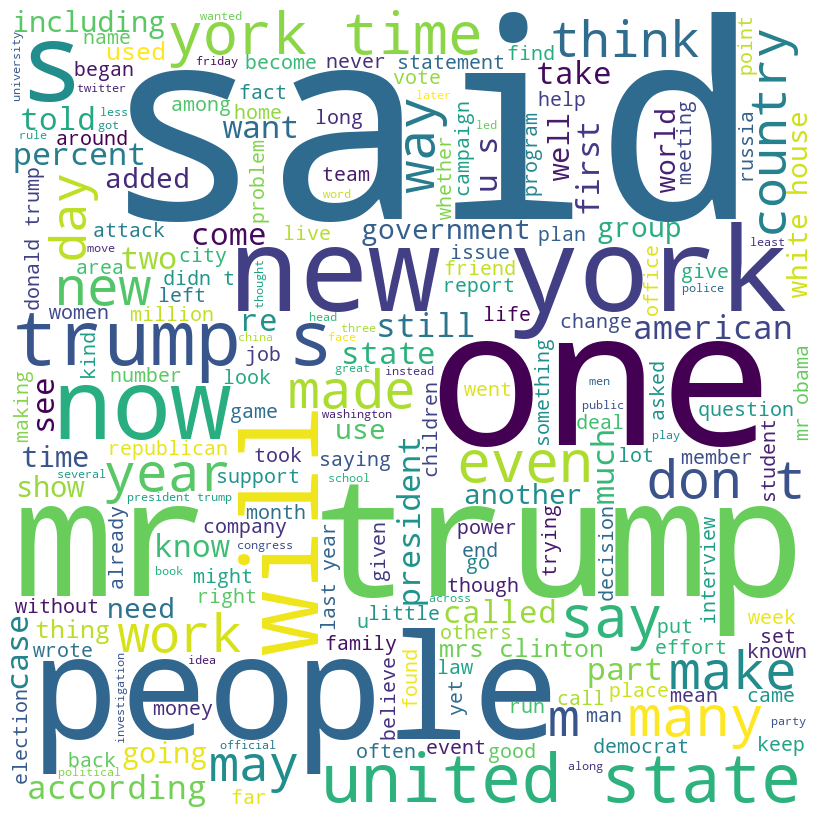

In [16]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(fake_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

# Clearning And Preprocessing

### 1. Regex

In [18]:
samplestring='"!</> This is an **example$$ </>^of!!!u%%sing&&%$various@@@symbols^^^&&!& </>*in@# a&&\ sample@@@string##%^^&!@# %%$"'

In [19]:
samplestring = re.sub(r'[^\w\s]','',samplestring)

In [20]:
print(samplestring)

 This is an example ofusingvarioussymbols in a samplestring 


### 2.Tokenization

In [17]:
nltk.word_tokenize("Hello how are you")

['Hello', 'how', 'are', 'you']

### 3.StopWords

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imagicahealth\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [24]:
from wordcloud import STOPWORDS
stop_words = set(STOPWORDS)
print(stop_words)

{"i'm", "who's", 'had', 'very', 'both', 'shall', "where's", 'my', 'for', 'how', 'after', "you'd", "i've", 'other', 'above', "you've", 'could', 'his', 'each', 'your', 'no', 'because', "isn't", 'itself', 'than', 'we', 'should', "he'd", 'more', 'such', "they've", "i'd", 'the', 'which', "i'll", 'cannot', "mustn't", 'that', 'r', "why's", 'before', "he'll", 'me', 'just', "what's", 'but', "we'd", 'also', 'com', 'at', 'has', 'there', 'this', 'while', "shan't", 'between', 'hers', 'from', 'into', 'about', 'during', 'here', 'own', "it's", 'myself', 'through', 'why', "that's", 'as', 'can', 'again', "can't", 'having', 'be', "we'll", 'who', 'am', "couldn't", 'so', 'doing', 'under', 'a', "he's", 'ought', "shouldn't", 'hence', "they're", 'what', 'k', 'ourselves', "she's", 'being', 'then', "here's", 'to', 'some', 'else', "weren't", 'theirs', 'been', 'get', 'did', 'it', "we're", 'when', 'have', "we've", 'her', 'their', 'of', "aren't", 'yours', 'if', 'off', 'below', "let's", 'not', 'do', 'or', 'him', "ha

In [25]:
sentence = "Covid-19 pandemic has impacted many countries and what it did to economy is very stressful"

In [26]:
words = nltk.word_tokenize(sentence)
words = [w for w in words if w not in stop_words]

In [27]:
words

['Covid-19',
 'pandemic',
 'impacted',
 'many',
 'countries',
 'economy',
 'stressful']

## 4. Lemmatization

In [28]:
lemmatizer=WordNetLemmatizer()

input_str="been had done languages cities mice"

In [29]:
#Tokenize the sentence
input_str=nltk.word_tokenize(input_str)

#Lemmatize each word
for word in input_str:
    print(lemmatizer.lemmatize(word))

been
had
done
language
city
mouse


### Apply all above things Regex, Tokenization,StopWords,Lemmatization

In [30]:
lemmatizer=WordNetLemmatizer()
for index,row in train.iterrows():
    filter_sentence = ''
    
    sentence = row['total']
    sentence = re.sub(r'[^\w\s]','',sentence) #cleaning
    
    words = nltk.word_tokenize(sentence) #tokenization
    
    words = [w for w in words if not w in stop_words]  #stopwords removal
    
    for word in words:
        filter_sentence = filter_sentence + ' ' + str(lemmatizer.lemmatize(word)).lower()
        
    train.loc[index,'total'] = filter_sentence

In [31]:
train = train[['total','label']]

In [32]:
train

,total,label
0,house dem aide we didnt even see comeys lette...,1
1,flynn hillary clinton big woman campus breitb...,0
2,why truth might get you fired consortiumnewsc...,1
3,15 civilians killed in single us airstrike ha...,1
4,iranian woman jailed fictional unpublished st...,1
...,...,...
20795,rapper ti trump poster child for white suprem...,0
20796,nfl playoffs schedule matchups odds the new y...,0
20797,macys is said receive takeover approach hudso...,0
20798,nato russia to hold parallel exercises in bal...,1


## Applying NLP Techniques

In [33]:
X_train = train['total']
Y_train = train['label']

## Bag-of-words / CountVectorizer

In [34]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [35]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


## TF-iDF Vectorizer

In [36]:
def vectorize_text(features, max_features):
    vectorizer = TfidfVectorizer( stop_words='english',
                            decode_error='strict',
                            analyzer='word',
                            ngram_range=(1, 2),
                            max_features=max_features
                            #max_df=0.5 # Verwendet im ML-Kurs unter Preprocessing                   
                            )
    feature_vec = vectorizer.fit_transform(features)
    return feature_vec.toarray()

In [37]:
tfidf_features = vectorize_text(['hello how are you doing','hi i am doing fine'],30)

In [38]:
tfidf_features

array([[0.44943642, 0.        , 0.        , 0.6316672 , 0.6316672 ,
        0.        , 0.        ],
       [0.33517574, 0.47107781, 0.47107781, 0.        , 0.        ,
        0.47107781, 0.47107781]])

## Apply NLP Techniques

In [39]:
#Feature extraction using count vectorization and tfidf.
count_vectorizer = CountVectorizer()
count_vectorizer.fit_transform(X_train)
freq_term_matrix = count_vectorizer.transform(X_train)
tfidf = TfidfTransformer(norm="l2")
tfidf.fit(freq_term_matrix)
tf_idf_matrix = tfidf.fit_transform(freq_term_matrix)

In [40]:
tf_idf_matrix

<20800x210581 sparse matrix of type '<class 'numpy.float64'>'
	with 5951727 stored elements in Compressed Sparse Row format>

## Modelling

In [41]:
test_counts = count_vectorizer.transform(test['total'].values)
from sklearn.linear_model import LogisticRegression
test_tfidf = tfidf.transform(test_counts)

#split in samples

X_train, X_test, y_train, y_test = train_test_split(tf_idf_matrix, Y_train, random_state=0)

## Logistic Regression

In [53]:
logreg = LogisticRegression(C=1e5)
logreg.fit(X_train, y_train)
pred = logreg.predict(X_test)
print('Accuracy of Lasso classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Lasso classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Lasso classifier on training set: 1.00
Accuracy of Lasso classifier on test set: 0.98


C:\Users\imagicahealth\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [54]:
report = classification_report(y_test, pred)
print("Logistic Regression Classification Report:\n", report)

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.98      0.98      0.98      2636

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



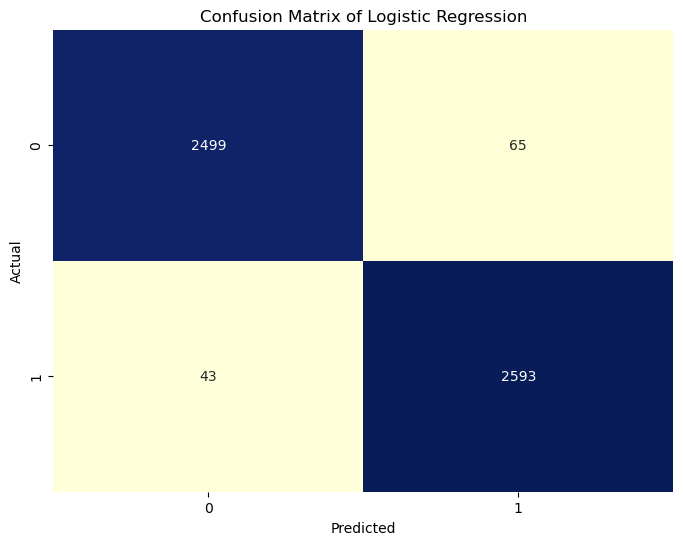

In [56]:

conf_matrix = confusion_matrix(y_test,pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of Logistic Regression')
plt.show()

In [57]:
conf_matrix

array([[2499,   65],
       [  43, 2593]], dtype=int64)

## MultinomialNB

In [45]:
NB = MultinomialNB()
NB.fit(X_train, y_train)
pred = NB.predict(X_test)
print('Accuracy of NB  classifier on training set: {:.2f}'
     .format(NB.score(X_train, y_train)))
print('Accuracy of NB classifier on test set: {:.2f}'
     .format(NB.score(X_test, y_test)))
cm = confusion_matrix(y_test, pred)
cm

Accuracy of NB  classifier on training set: 0.89
Accuracy of NB classifier on test set: 0.85


array([[2557,    7],
       [ 797, 1839]], dtype=int64)

In [58]:
report = classification_report(y_test, pred)
print("classification Report of MultinomialNB:\n", report)

classification Report of MultinomialNB:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      2564
           1       0.98      0.98      0.98      2636

    accuracy                           0.98      5200
   macro avg       0.98      0.98      0.98      5200
weighted avg       0.98      0.98      0.98      5200



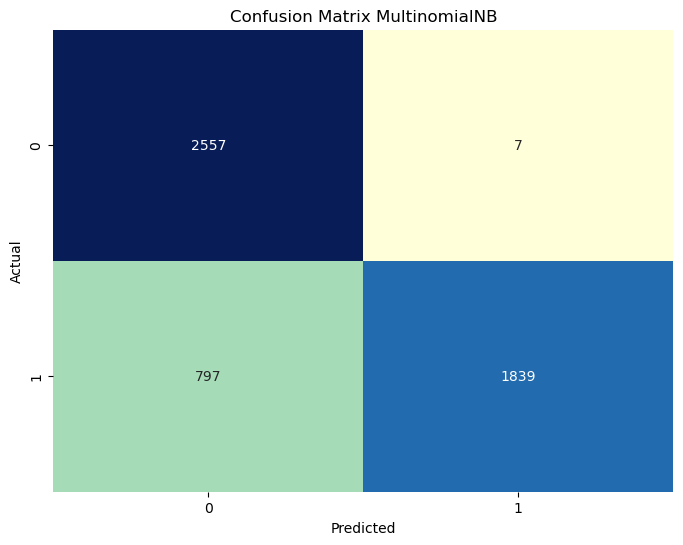

In [47]:
conf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix MultinomialNB')
plt.show()

### Decision Tree Classifier

In [61]:
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9705769230769231


In [62]:
report = classification_report(y_test, y_pred)
print("Classification Report Of  Decision Tree Classifier:\n", report)

Classification Report Of  Decision Tree Classifier:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2564
           1       0.97      0.97      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



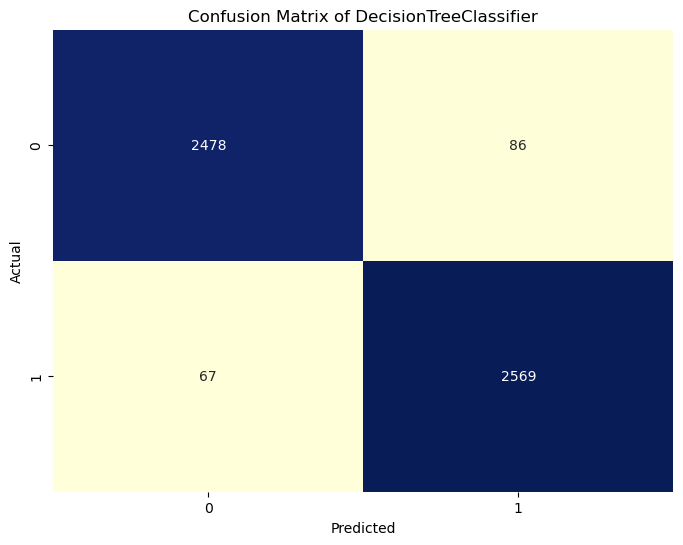

array([[2478,   86],
       [  67, 2569]], dtype=int64)

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of DecisionTreeClassifier')
plt.show()
conf_matrix

### Random Forest Classifier

In [51]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9386538461538462


In [66]:
report = classification_report(y_test, y_pred)
print("Classification Report of RandomForestClassifier:\n", report)

Classification Report of RandomForestClassifier:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      2564
           1       0.97      0.97      0.97      2636

    accuracy                           0.97      5200
   macro avg       0.97      0.97      0.97      5200
weighted avg       0.97      0.97      0.97      5200



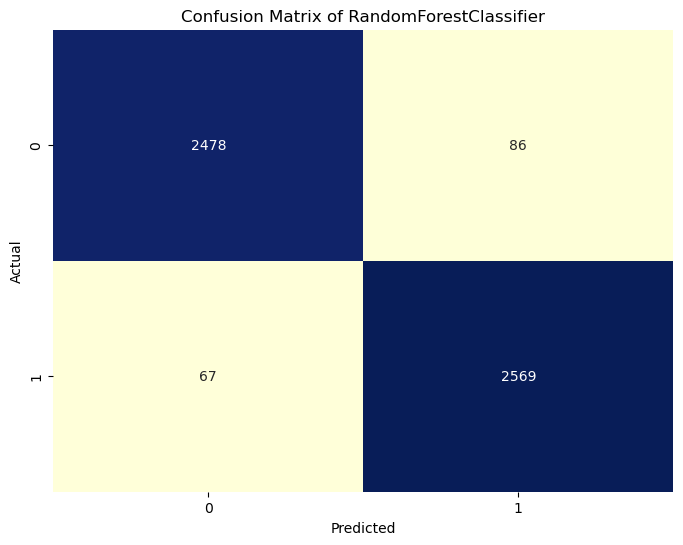

array([[2478,   86],
       [  67, 2569]], dtype=int64)

In [65]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix of RandomForestClassifier')
plt.show()
conf_matrix

## Pipeline

In [ ]:
#Assiging the variables again as once transformed vectors can't be transformed again using pipeline.
X_train = train['total']
Y_train = train['label']

In [ ]:
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer(norm='l2')),
    ('clf', linear_model.LogisticRegression(C=1e5)),
])

In [ ]:
pipeline.fit(X_train, Y_train)

In [ ]:
pipeline.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [ ]:
#saving the pipeline
filename = 'pipeline.sav'
joblib.dump(pipeline, filename)

In [ ]:
filename = './pipeline.sav'

## Prediction

In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.predict(["flynn hillary clinton big woman campus breitbart daniel j flynnever get feeling life circle roundabout rather head straight line toward intended destination hillary clinton remains big woman campus leafy liberal wellesley massachusetts everywhere else vote likely inauguration dress remainder day way miss havisham forever wore wedding dress speaking great expectations hillary rodham overflowed 48 year ago first addressed wellesley graduating class the president college informed gathered 1969 student needed debate far i could ascertain spokesman kind like democratic primary 2016 minus term unknown even seven sisters school i glad miss adams made clear i speaking today u 400 u miss rodham told classmate after appointing edger bergen charlie mccarthys mortimer snerds attendance bespectacled granny glass awarding matronly wisdom least john lennon wisdom took issue previous speaker despite becoming first win election seat u s senate since reconstruction edward brooke came criticism calling empathy goal protestors criticized tactic though clinton senior thesis saul alinsky lamented black power demagogue elitist arrogance repressive intolerance within new left similar word coming republican necessitated brief rebuttal trust rodham ironically observed 1969 one word i asked class rehearsal wanted say everyone came said talk trust talk lack trust u way feel others talk trust bust what say what say feeling permeates generation perhaps even understood distrusted the trust bust certainly busted clintons 2016 plan she certainly even understand people distrusted after whitewater travelgate vast conspiracy benghazi missing email clinton found distrusted voice friday there load compromising road broadening political horizon and distrust american people trump edged 48 percent 38 percent question immediately prior novembers election stood major reason closing horizon clinton described vanquisher supporter embracing lie con alternative fact assault truth reason she failed explain american people chose lie truth as history major among today know well people power invent fact attack question mark beginning end free society offered that hyperbole like many people emerge 1960s hillary clinton embarked upon long strange trip from high school goldwater girl wellesley college republican president democratic politician clinton drank time place gave degree more significantly went idealist cynic comparison two wellesley commencement address show way back lamented long leader viewed politics art possible challenge practice politics art making appears impossible possible now big woman campus odd woman white house wonder current station even possible why arent i 50 point ahead asked september in may asks isnt president the woman famously dubbed congenital liar bill safire concludes lie mind getting stood election day like finding jilted bride wedding day inspires dangerous delusion"])

In [ ]:
print(result) 